# Objects Over Time

With a provided video stream, let's track and analyze the appearance of object classes over time.

Utilizing [Ultralytics YOLOv8](https://github.com/ultralytics/ultralytics) and a 

In [1]:
import flask
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

This notebook needs a camera stream that will return an JPG image frame with a simple GET request. For a Raspberry Pi, [ayufan's camerastreamer](https://github.com/ayufan/camera-streamer) is a fantastic choice.

In [2]:
CAMERA_STREAM = "http://localhost:8080/snapshot"
ACTIVE_ZONE = [(1, 0), (1, 1), (0, 1), (0, 0)]

In [3]:
def collect_image():
    resp = requests.get(CAMERA_STREAM, stream=True).raw
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    try:
        image = cv2.resize(image, (1920, 1080))
    except Exception as e:
        f"Failed to collect image: {e}"
    return image

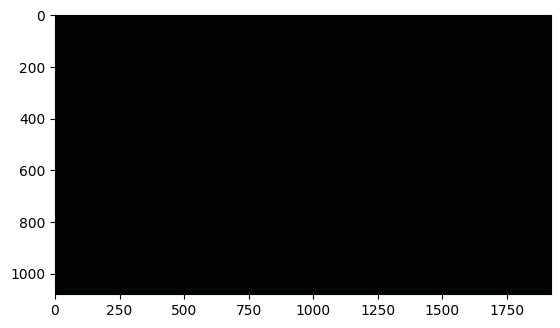

In [4]:
plt.imshow(collect_image())

In [5]:
model = YOLO("yolov8n.pt")

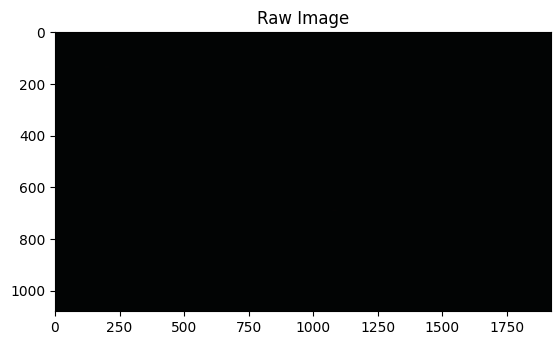

Text(0.5, 1.0, 'Annotated Image')

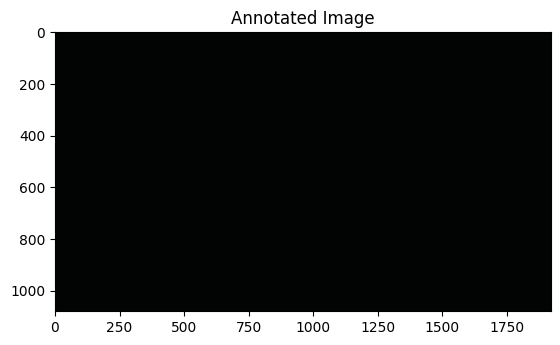

In [13]:
image = collect_image()
plt.imshow(image)
plt.title("Raw Image")
plt.show()
results = model.track(image, persist=True, verbose=False)[0]
plt.imshow(results.plot())
plt.title("Annotated Image")